# Workshop Mascaret

Test 24 case represents break hydraulic dam of Malpasset. 

## Exo 1: Run Test24 : Malpasset

### Extract Geofile informations 

Use the MascaeretGeoFile class to dump the information of the file (function summary)

In [6]:
from os import path, environ
from data_manip.formats.mascaretgeo_file import MascaretGeoFile

geo_file = path.join(environ['HOMETEL'],
                     'examples', 
                     'mascaret', 
                     'Test24', 
                     'geometrie')

In [ ]:
# File with a single reach
mascgeo_file = MascaretGeoFile(geo_file, 'geo')

print(mascgeo_file.summary())

### Run the test case 

Run the mascaret case.

The cell below is a bash shell.

In [3]:
%%bash

cd $HOMETEL/examples/mascaret/Test24 && mascaret.py mascaret_imp.xcas



Loading Options and Configurations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



Loading Options and Configurations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  _                        _    
 | |                      | |   
 | |_  _ __  _   _  _ __  | | __
 | __|| '__|| | | || '_ \ | |/ /
 | |_ | |   | |_| || | | ||   < 
  \__||_|    \__,_||_| |_||_|\_\
                                
                                
~+> Creating FichierCas.txt
~+> Copying Abaques.txt
~+> Copying Controle.txt
~+> Copying dico_Courlis.txt
 Fichiercas : FichierCas.txt                                                                                                                                                                                                                                                 

 MASCARET v8.1.4 == Copyright (C) 2000-2017 EDF-CEREMA ==

 Data File : mascaret_imp.xcas

 Study name : Etude hydraulique1d

 Hydraulic 

## Exo 2: Extraction and Plot results

### Extract the summary data

Use the class MascaretFile to load the .opt file defined below.

This extraction allow to know the sections, the time steps and output variables.

In [7]:
from data_manip.formats.mascaret_file import MascaretFile

opt_file = path.join(environ['HOMETEL'], 
                     'examples', 
                     'mascaret',
                     'Test24', 
                     'mascaret_imp_ecr.opt')

In [8]:
# Selection to display
masc_file = MascaretFile(opt_file)

print(masc_file.summary())
del masc_file

~> MascaretFile: /home/B61570/opentelemac/git/trunk/examples/mascaret/Test24/mascaret_imp_ecr.opt (mode=r)
    - Reach #1 (Reach_1) with 774 sections
        0) Section #1 (Profil_1) at pk -4820.000000
        1) Section #2 (Profil_2) at pk -4793.330000
        2) Section #3 (Profil_3) at pk -4766.670000
        3) Section #4 (Profil_4) at pk -4740.000000
        4) Section #5 (Profil_5) at pk -4713.330000
        5) Section #6 (Profil_6) at pk -4686.670000
        6) Section #7 (Profil_7) at pk -4660.000000
        7) Section #8 (Profil_8) at pk -4633.330000
        8) Section #9 (Profil_9) at pk -4606.670000
        9) Section #10 (Profil_10) at pk -4580.000000
        10) Section #11 (Profil_11) at pk -4553.330000
        11) Section #12 (Profil_12) at pk -4526.670000
        12) Section #13 (Profil_13) at pk -4500.000000
        13) Section #14 (Profil_14) at pk -4475.000000
        14) Section #15 (Profil_15) at pk -4450.000000
        15) Section #16 (Profil_16) at pk -4425.00000

### Display profiles results for different times

Display the bottom and the water level for the following times step: 0, 5, 10, 15, 20, 25, 30

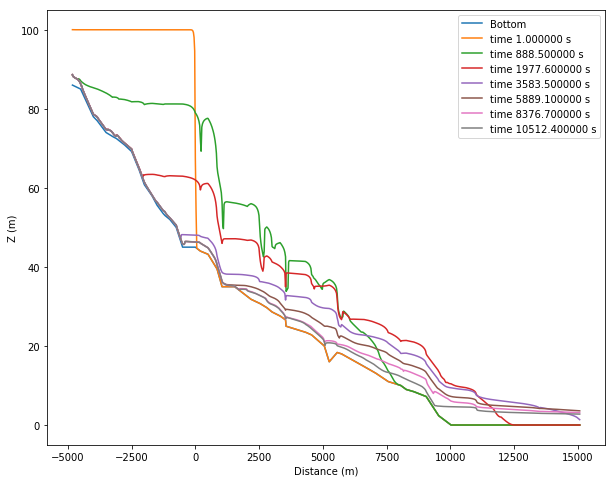

In [9]:
from data_manip.formats.mascaret_file import MascaretFile
# Import for the graphic
import matplotlib.pyplot as plt
from postel.plot1d import plot1d

# Creation of mascaret object
masc_file = MascaretFile(opt_file)

# Variables to display
varnames = ['ZREF','Z']
reach_id = 1 
# Time steps to display
times_list =range(0,31,5) 
# Getting the branche
reach = masc_file.reaches[reach_id]
# graphic creation
fig, ax = plt.subplots(figsize=(10,8))
# loop for the variable names 
for varname in varnames:
    # Get variable positions with the variable name
    var_pos = masc_file.get_position_var_abbr(varname)
    if varname == 'ZREF':
        # Extracting values
        values = masc_file.get_values_at_reach(0, reach_id, var_pos)
        # 1d plot
        plot1d(ax, reach.get_section_pk_list(),values,
               plot_label='Bottom' ,
               x_label='Distance (m)',y_label='Z (m)')
    else:
        # loop for the times
        for time_index in times_list:
            # extracting values
            values = masc_file.get_values_at_reach(time_index,
                                                   reach_id, var_pos) 
            # 1d plot                                       
            plot1d(ax, reach.get_section_pk_list(),values,
                   plot_label='time %f s' % masc_file.times[time_index],
                   x_label='Distance (m)',y_label='Z (m)')


# Displaying legend
ax.legend()

# Showing figure
plt.show()

# Clear data
del plt
del masc_file

### Display temporal results for sections

Select the sections with the following pk:

5058.5, 7133.42, 9672.25,11571.54

In [10]:
import os.path
from data_manip.formats.mascaret_file import MascaretFile

# Creation of mascaret object
masc_file = MascaretFile(opt_file)

# Getting the branche
reach_id = 1
reachs = masc_file.reaches[reach_id]

pk_list = [5058.5, 7133.42, 9672.25, 11571.54]
# Getting the sections
sections=[]
for id,reach in enumerate(reachs):
    if reach.pk in pk_list:
        sections.append(reach)
        print(reach)

Section #383 (Profil_383) at pk 5058.500000
Section #463 (Profil_463) at pk 7133.420000
Section #562 (Profil_562) at pk 9672.250000
Section #637 (Profil_637) at pk 11571.540000


Display temporal water level for the sections

In [ ]:
import matplotlib.pyplot as plt
from postel.plot1d import plot1d

# Variables to display
varname = "Z"
var_pos = masc_file.get_position_var_abbr(varname)

fig, ax = plt.subplots(figsize=(10, 8))
# loop for the sections
for section in sections:
    # extracting values
    values = masc_file.get_series(reach_id, section.id, [var_pos])
    # 1d plot
    plot1d(ax, masc_file.times, values,
           plot_label='%s, pk=%.2f' % (section.name,section.pk),
           x_label='Time (s)',
           y_label='H (m)')

# Displaying legend
ax.legend()

# Showing figure
plt.show()

# Clear data
del plt
del masc_file

## Exo 3: Files creation 

In [14]:
from data_manip.formats.mascaret_file import MascaretFile

path_rep = path.join(environ['HOMETEL'], 
                     'examples',
                     'mascaret',
                     'Test24')
opt_file = path.join(path_rep, 'mascaret_imp_ecr.opt')

### ".lig" file Creation  (LIDOP format)

Write the last time step in the LIDOP format file for compute reprise.

In [15]:
# Creation of mascaret object
masc_file = MascaretFile(opt_file)

# The last time_step for .lig file
id_time = masc_file.ntimestep - 1
# id_time = -1 # give the same result

# Exporting LIDOP format file  
name_file = 'mascaret_{}.lig'.format(masc_file.times[id_time])

masc_file.export_as_lig(os.path.join(path_rep, name_file),
                        id_time)
print(name_file)

del masc_file

mascaret_19529.2.lig


Display the .lig file:

In [ ]:
%%bash

cat $HOMETEL/examples/mascaret/Test24/mascaret_19529.2.lig

### Delete variable of Opthyca result file

In [18]:
opt_zq_file = os.path.join(path_rep, 'mascaret_imp_ecr_ZQ.opt')

Keep in new results file (use opt_zq_file for the name of the file):
    - Initial and last  time step 
    - Three variables :  ZREF, Z, Q   

In [20]:
# Creation of mascaret object
masc_file = MascaretFile(opt_file)

# List of time index 
times_indexes=[0,-1]
# [initialisation time step, last time step]
varname = ["ZREF","Z","Q"]
vars_indexes=[]

# Get position with variable names
for var in varname:
    vars_indexes.append(masc_file.get_position_var_abbr(var))

print('vars_indexes = ',vars_indexes)
print('times_indexes = ',times_indexes)

# Write a new file
masc_file.write_optfile(opt_zq_file, 
                        times_indexes, 
                        vars_indexes)

del masc_file

vars_indexes =  [0, 1, 15]
times_indexes =  [0, -1]


Check the new file which is created by reopening it with MascaretFile or do a cat in a bash cell.

In [21]:
masc_file_new = MascaretFile(opt_zq_file)
print(masc_file_new.summary())
del masc_file_new

~> MascaretFile: /home/B61570/opentelemac/git/trunk/examples/mascaret/Test24/mascaret_imp_ecr_ZQ.opt (mode=r)
    - Reach #1 (Reach_1) with 774 sections
        0) Section #1 (Profil_1) at pk -4820.000000
        1) Section #2 (Profil_2) at pk -4793.330000
        2) Section #3 (Profil_3) at pk -4766.670000
        3) Section #4 (Profil_4) at pk -4740.000000
        4) Section #5 (Profil_5) at pk -4713.330000
        5) Section #6 (Profil_6) at pk -4686.670000
        6) Section #7 (Profil_7) at pk -4660.000000
        7) Section #8 (Profil_8) at pk -4633.330000
        8) Section #9 (Profil_9) at pk -4606.670000
        9) Section #10 (Profil_10) at pk -4580.000000
        10) Section #11 (Profil_11) at pk -4553.330000
        11) Section #12 (Profil_12) at pk -4526.670000
        12) Section #13 (Profil_13) at pk -4500.000000
        13) Section #14 (Profil_14) at pk -4475.000000
        14) Section #15 (Profil_15) at pk -4450.000000
        15) Section #16 (Profil_16) at pk -4425.00

or

In [23]:
%%bash
cat $HOMETEL/examples/mascaret/Test24/mascaret_imp_ecr_ZQ.opt

[variables]
"Cote du fond";"ZREF";"m";0
"Cote de l eau";"Z";"m";0
"Debit total";"Q";"m3/s";0
[resultats]
1.0;" 1";"    1";-4820.0;86.0;100.018;50.0 
1.0;" 1";"    2";-4793.33;85.9167;100.009;7.477 
1.0;" 1";"    3";-4766.67;85.8333;100.002;1.736 
1.0;" 1";"    4";-4740.0;85.75;100.0;0.406 
1.0;" 1";"    5";-4713.33;85.6667;100.0;0.096 
1.0;" 1";"    6";-4686.67;85.5833;100.0;0.023 
1.0;" 1";"    7";-4660.0;85.5;100.0;0.005 
1.0;" 1";"    8";-4633.33;85.4167;100.0;0.001 
1.0;" 1";"    9";-4606.67;85.3333;100.0;0.0 
1.0;" 1";"   10";-4580.0;85.25;100.0;0.0 
1.0;" 1";"   11";-4553.33;85.1667;100.0;0.0 
1.0;" 1";"   12";-4526.67;85.0833;100.0;0.0 
1.0;" 1";"   13";-4500.0;85.0;100.0;0.0 
1.0;" 1";"   14";-4475.0;84.65;100.0;0.0 
1.0;" 1";"   15";-4450.0;84.3;100.0;0.0 
1.0;" 1";"   16";-4425.0;83.95;100.0;0.0 
1.0;" 1";"   17";-4400.0;83.6;100.0;0.0 
1.0;" 1";"   18";-4375.0;83.25;100.0;0.0 
1.0;" 1";"   19";-4350.0;82.9;100.0;0.0 
1.0;" 1";"   20";-4325.0;82.55;100.0;0.0 
1.0;" 1";"   21"